# 수정한 부분

1. 바이올린플롯으로 비율을 나타낸 것보다 crosstab으로 나타내주는 것이 더 나을 것이라는 피드백을 받고 소득과 질병의 상관관계에 대해 crosstab으로 수정

2. 그래프 상에서 x축과 y축이 어떤 것을 나타내주는 것인지 파악하기 어렵다는 피드백을 받고 시간에 따른 소득과 질병의 상관관계의 plot 그래프의 x축과 y축 label과 xticks, yticks를 파악하기 쉽게 설정

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

# 2019년 국민건강영양조사 csv를 이용하여 소득과 질병의 상관관계 알아보기

In [2]:
data19 = pd.read_csv('hn19_all.csv', encoding = 'cp949', low_memory = False)
data19.head(5)

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,2021.02.26.,A501215301,A5012153,2019,1,1,1,A501,1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.02.26.,A501215303,A5012153,2019,1,1,1,A501,1,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021.02.26.,A501220401,A5012204,2019,1,1,1,A501,1,53,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
3,2021.02.26.,A501220402,A5012204,2019,1,1,1,A501,2,50,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
4,2021.02.26.,A501220403,A5012204,2019,1,1,1,A501,1,16,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0


데이터셋 상에서 각 숫자는 0. 없음, 1. 있음, 8. 비해당(청소년, 소아, 의사진단 받지 않음), 9. 모름, 무응답을 나타내므로 0과 1 값을 제외한 나머지 숫자들은 np.nan으로 값을 바꾸어주어 dropna 해주었음.

## 1. 소득과 뇌졸중 유병 여부와의 관계

In [3]:
data19['DI3_pr_needs'] = [np.nan if b > 1 else b for b in data19['DI3_pr']]
data19.groupby('incm5')['DI3_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,38.0,0.842105,0.369537,0.0,1.0,1.0,1.0,1.0
2.0,35.0,0.771429,0.426043,0.0,1.0,1.0,1.0,1.0
3.0,33.0,0.696970,0.466694,0.0,0.0,1.0,1.0,1.0
4.0,21.0,0.666667,0.483046,0.0,0.0,1.0,1.0,1.0
5.0,19.0,0.789474,0.418854,0.0,1.0,1.0,1.0,1.0


In [6]:
#DI3_pr_needs의 0.0은 정상, 1.0은 유병을 나타낸다.
pd.crosstab(data19.incm5 ,data19.DI3_pr_needs)

DI3_pr_needs,0.0,1.0
incm5,,
1.0,6,32
2.0,8,27
3.0,10,23
4.0,7,14
5.0,4,15


In [7]:
DI3_crosstab = pd.crosstab(data19.incm5 ,data19.DI3_pr_needs, normalize = 'index')
DI3_crosstab

DI3_pr_needs,0.0,1.0
incm5,,
1.0,0.157895,0.842105
2.0,0.228571,0.771429
3.0,0.303030,0.696970
4.0,0.333333,0.666667
5.0,0.210526,0.789474


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

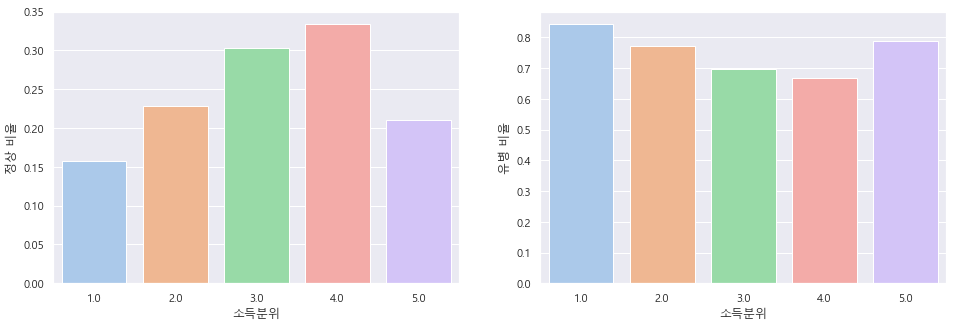

In [8]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DI3_crosstab.index, y = DI3_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DI3_crosstab.index, y = DI3_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [9]:
data19_DI3 = pd.DataFrame(data19.DI3_pr, data19.incm5)
data19_DI3 = data19_DI3.reset_index()
data19_DI3['DI3_pr_needs'] = [np.nan if b > 1 else b for b in data19['DI3_pr']]
data19_DI3 = data19_DI3.dropna()
[R1, p1] = stats.pearsonr(data19_DI3.incm5, data19_DI3.DI3_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DI3.incm5, data19_DI3.DI3_pr_needs)
print([R2, p2])

[-0.06289335251657004, 0.4859310494747577]
[-0.0910784979082367, 0.3124187079954059]


소득 구간이 증가할수록 뇌졸중 발병 비율이 줄어드는 양상이 보이나 5분위에서 다시 증가하는 것을 볼 수 있다. pearson과 spearman 두 상관관계 검정에서 p값이 0.05보다 훨씬 큰 값을 보이는 것으로 보아 소득과 뇌졸중은 관계가 없다.

## 2. 소득과 심근경색증 유병 여부의 관계

In [13]:
data19['DI5_pr_needs'] = [np.nan if b > 1 else b for b in data19['DI5_pr']]
data19.groupby('incm5')['DI5_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,17.0,0.882353,0.332106,0.0,1.0,1.0,1.0,1.0
2.0,18.0,0.944444,0.235702,0.0,1.0,1.0,1.0,1.0
3.0,14.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
4.0,11.0,0.818182,0.404520,0.0,1.0,1.0,1.0,1.0
5.0,16.0,0.875000,0.341565,0.0,1.0,1.0,1.0,1.0


In [14]:
pd.crosstab(data19.incm5 ,data19.DI5_pr_needs)

DI5_pr_needs,0.0,1.0
incm5,,
1.0,2,15
2.0,1,17
3.0,0,14
4.0,2,9
5.0,2,14


In [15]:
DI5_crosstab = pd.crosstab(data19.incm5 ,data19.DI5_pr_needs, normalize = 'index')
DI5_crosstab

DI5_pr_needs,0.0,1.0
incm5,,
1.0,0.117647,0.882353
2.0,0.055556,0.944444
3.0,0.000000,1.000000
4.0,0.181818,0.818182
5.0,0.125000,0.875000


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

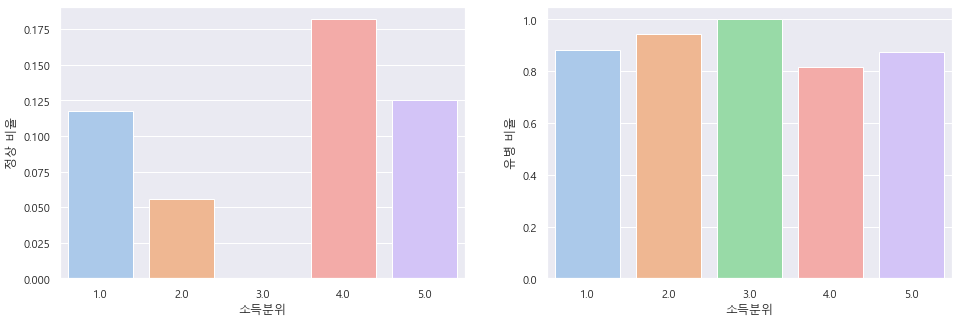

In [16]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DI5_crosstab.index, y = DI5_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DI5_crosstab.index, y = DI5_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [17]:
data19_DI5 = pd.DataFrame(data19.DI5_pr, data19.incm5)
data19_DI5 = data19_DI5.reset_index()
data19_DI5['DI5_pr_needs'] = [np.nan if b > 1 else b for b in data19['DI5_pr']]
data19_DI5 = data19_DI5.dropna()
[R1, p1] = stats.pearsonr(data19_DI5.incm5, data19_DI5.DI5_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DI5.incm5, data19_DI5.DI5_pr_needs)
print([R2, p2])

[-0.020897850190928567, 0.8687608112185053]
[0.017492384186065555, 0.8900015503348271]


전체적으로 높은 비율을 보이고 있지만 2분위와 3분위에서 특히 높은 비율을 보이고 있다. 1분위에서 3분위까지 비율이 증가하는 것처럼 보이나 4분위가 되고 다시 감소하였다가 5분위에 증가하는 것을 볼 수 있다. 또한 두 상관관계 검정에서도 p 값이 0.05보다 크므로 소득과 심근경색증 사이에는 관계가 없다.

## 3. 소득과 협심증 유병 여부와의 관계

In [18]:
data19['DI6_pr_needs'] = [np.nan if b > 1 else b for b in data19['DI6_pr']]
data19.groupby('incm5')['DI6_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,28.0,0.928571,0.262265,0.0,1.0,1.0,1.0,1.0
2.0,27.0,0.740741,0.446576,0.0,0.5,1.0,1.0,1.0
3.0,17.0,0.823529,0.392953,0.0,1.0,1.0,1.0,1.0
4.0,30.0,0.833333,0.379049,0.0,1.0,1.0,1.0,1.0
5.0,24.0,0.916667,0.282330,0.0,1.0,1.0,1.0,1.0


In [19]:
pd.crosstab(data19.incm5 ,data19.DI6_pr_needs)

DI6_pr_needs,0.0,1.0
incm5,,
1.0,2,26
2.0,7,20
3.0,3,14
4.0,5,25
5.0,2,22


In [20]:
DI6_crosstab = pd.crosstab(data19.incm5 ,data19.DI6_pr_needs, normalize = 'index')
DI6_crosstab

DI6_pr_needs,0.0,1.0
incm5,,
1.0,0.071429,0.928571
2.0,0.259259,0.740741
3.0,0.176471,0.823529
4.0,0.166667,0.833333
5.0,0.083333,0.916667


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

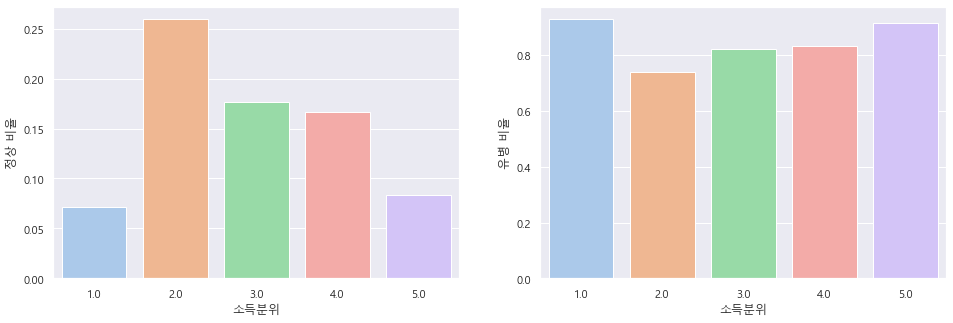

In [21]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DI6_crosstab.index, y = DI6_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DI6_crosstab.index, y = DI6_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [22]:
data19_DI6 = pd.DataFrame(data19.DI6_pr, data19.incm5)
data19_DI6 = data19_DI6.reset_index()
data19_DI6['DI6_pr_needs'] = [np.nan if b > 1 else b for b in data19['DI6_pr']]
data19_DI6 = data19_DI6.dropna()
[R1, p1] = stats.pearsonr(data19_DI6.incm5, data19_DI6.DI6_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DI6.incm5, data19_DI6.DI6_pr_needs)
print([R2, p2])

[0.03677512184756787, 0.7220491635170644]
[-0.005516527543538593, 0.9574585639864039]


바이올린플롯을 통해 2분위에서 가장 낮은 비율을 보이고 있고 1분위와 5분위 양극단에서 높은 비율을 차지하고 있음을 알 수 있다. 또한 두 상관관계 검정에서 p값이 모두 0.05보다 큰 값이 나왔으므로 소득과 협심증 간에는 관계가 없다.

## 4. 소득과 관절염 유병 여부와의 관계

In [23]:
data19['DM1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM1_pr']]
data19.groupby('incm5')['DM1_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,163.0,0.889571,0.314390,0.0,1.0,1.0,1.0,1.0
2.0,179.0,0.888268,0.315920,0.0,1.0,1.0,1.0,1.0
3.0,151.0,0.887417,0.317134,0.0,1.0,1.0,1.0,1.0
4.0,137.0,0.854015,0.354387,0.0,1.0,1.0,1.0,1.0
5.0,148.0,0.858108,0.350124,0.0,1.0,1.0,1.0,1.0


In [24]:
pd.crosstab(data19.incm5 ,data19.DM1_pr_needs)

DM1_pr_needs,0.0,1.0
incm5,,
1.0,18,145
2.0,20,159
3.0,17,134
4.0,20,117
5.0,21,127


In [25]:
DM1_crosstab = pd.crosstab(data19.incm5 ,data19.DM1_pr_needs, normalize = 'index')
DM1_crosstab

DM1_pr_needs,0.0,1.0
incm5,,
1.0,0.110429,0.889571
2.0,0.111732,0.888268
3.0,0.112583,0.887417
4.0,0.145985,0.854015
5.0,0.141892,0.858108


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

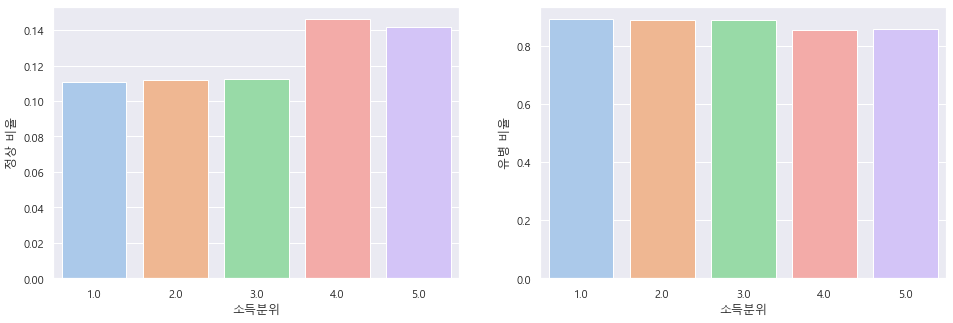

In [27]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DM1_crosstab.index, y = DM1_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DM1_crosstab.index, y = DM1_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [28]:
data19_DM1 = pd.DataFrame(data19.DM1_pr, data19.incm5)
data19_DM1 = data19_DM1.reset_index()
data19_DM1['DM1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM1_pr']]
data19_DM1 = data19_DM1.dropna()
[R1, p1] = stats.pearsonr(data19_DM1.incm5, data19_DM1.DM1_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DM1.incm5, data19_DM1.DM1_pr_needs)
print([R2, p2])

[-0.035782577215042494, 0.3657494612663242]
[-0.03135721124963677, 0.4280420766405385]


모든 소득 분위에서 0.8 정도의 비율로 나타나며 두 상관관계 검정에서 p값이 0.05보다 크므로 소득과 관절염 사이에는 관계가 없다.

## 5. 소득과 골관절염 유병 여부와의 관계

In [29]:
data19['DM2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM2_pr']]
data19.groupby('incm5')['DM2_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,151.0,0.887417,0.317134,0.0,1.0,1.0,1.0,1.0
2.0,156.0,0.910256,0.286735,0.0,1.0,1.0,1.0,1.0
3.0,134.0,0.910448,0.286611,0.0,1.0,1.0,1.0,1.0
4.0,125.0,0.864000,0.344168,0.0,1.0,1.0,1.0,1.0
5.0,126.0,0.857143,0.351324,0.0,1.0,1.0,1.0,1.0


In [30]:
pd.crosstab(data19.incm5 ,data19.DM2_pr_needs)

DM2_pr_needs,0.0,1.0
incm5,,
1.0,17,134
2.0,14,142
3.0,12,122
4.0,17,108
5.0,18,108


In [31]:
DM2_crosstab = pd.crosstab(data19.incm5 ,data19.DM2_pr_needs, normalize = 'index')
DM2_crosstab

DM2_pr_needs,0.0,1.0
incm5,,
1.0,0.112583,0.887417
2.0,0.089744,0.910256
3.0,0.089552,0.910448
4.0,0.136000,0.864000
5.0,0.142857,0.857143


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

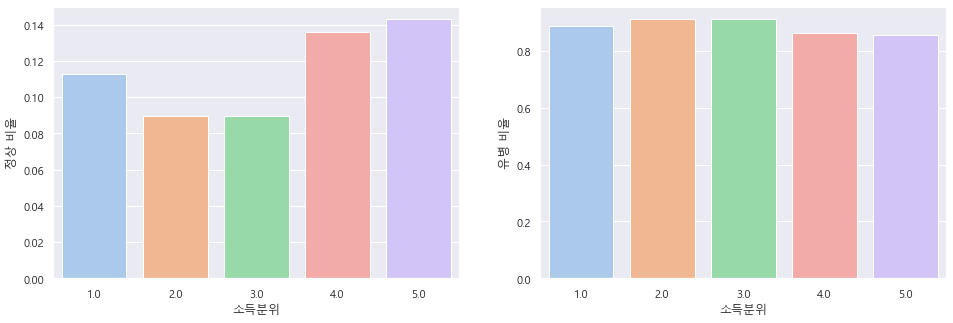

In [32]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DM2_crosstab.index, y = DM2_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DM2_crosstab.index, y = DM2_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [33]:
data19_DM2 = pd.DataFrame(data19.DM2_pr, data19.incm5)
data19_DM2 = data19_DM2.reset_index()
data19_DM2['DM2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM2_pr']]
data19_DM2 = data19_DM2.dropna()
[R1, p1] = stats.pearsonr(data19_DM2.incm5, data19_DM2.DM2_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DM2.incm5, data19_DM2.DM2_pr_needs)
print([R2, p2])

[-0.03994127795188234, 0.34244151009135376]
[-0.02717223528793624, 0.5184670750228721]


소득분위 2분위와 3분위에서 다른 분위들보다 조금 높은 비율을 보이고 있음을 알 수 있다. 그러므로 중산층에서 골관절염 발병 비율이 높다는 것을 알 수 있다. 그러나 두 상관 관계 검정 상에서 보면 알 수 있듯이 소득과 골관절염 사이에는 관계가 없다.

## 6. 소득과 류마티스관절염 유병 여부와의 관계

In [34]:
data19['DM3_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM3_pr']]
data19.groupby('incm5')['DM3_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,19.0,0.789474,0.418854,0.0,1.00,1.0,1.0,1.0
2.0,38.0,0.710526,0.459606,0.0,0.00,1.0,1.0,1.0
3.0,20.0,0.700000,0.470162,0.0,0.00,1.0,1.0,1.0
4.0,14.0,0.714286,0.468807,0.0,0.25,1.0,1.0,1.0
5.0,28.0,0.857143,0.356348,0.0,1.00,1.0,1.0,1.0


In [35]:
pd.crosstab(data19.incm5 ,data19.DM3_pr_needs)

DM3_pr_needs,0.0,1.0
incm5,,
1.0,4,15
2.0,11,27
3.0,6,14
4.0,4,10
5.0,4,24


In [36]:
DM3_crosstab = pd.crosstab(data19.incm5 ,data19.DM3_pr_needs, normalize = 'index')
DM3_crosstab

DM3_pr_needs,0.0,1.0
incm5,,
1.0,0.210526,0.789474
2.0,0.289474,0.710526
3.0,0.300000,0.700000
4.0,0.285714,0.714286
5.0,0.142857,0.857143


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

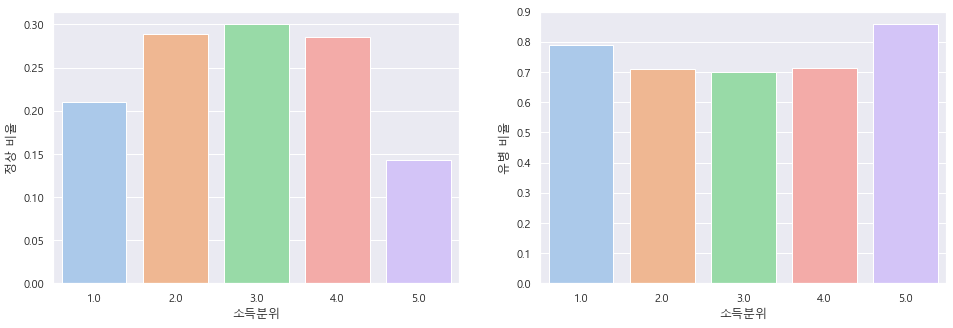

In [37]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DM3_crosstab.index, y = DM3_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DM3_crosstab.index, y = DM3_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [38]:
data19_DM3 = pd.DataFrame(data19.DM3_pr, data19.incm5)
data19_DM3 = data19_DM3.reset_index()
data19_DM3['DM3_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM3_pr']]
data19_DM3 = data19_DM3.dropna()
[R1, p1] = stats.pearsonr(data19_DM3.incm5, data19_DM3.DM3_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DM3.incm5, data19_DM3.DM3_pr_needs)
print([R2, p2])

[0.09588903162837062, 0.3305270543343432]
[0.06957481603467208, 0.48065411784402046]


소득분위 2분위, 3분위 ,4분위에서는 0.71 정도의 비율을 보이고 있지만 1분위에서 0.79, 5분위에서는 급격히 증가하여 0.86 정도의 비율을 보이고 있음을 알 수 있다. 또한 두 상관관계 검정 상에서 p 값이 0.05보다 크므로 소득과 류마티스 관절염 사이에는 관계가 없다.

## 7. 소득과 폐결핵 유병 여부와의 관계

In [39]:
data19['DJ2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DJ2_pr']]
data19.groupby('incm5')['DJ2_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0
2.0,42.0,0.071429,0.260661,0.0,0.0,0.0,0.0,1.0
3.0,40.0,0.050000,0.220721,0.0,0.0,0.0,0.0,1.0
4.0,43.0,0.023256,0.152499,0.0,0.0,0.0,0.0,1.0
5.0,30.0,0.033333,0.182574,0.0,0.0,0.0,0.0,1.0


In [40]:
pd.crosstab(data19.incm5 ,data19.DJ2_pr_needs)

DJ2_pr_needs,0.0,1.0
incm5,,
1.0,40,2
2.0,39,3
3.0,38,2
4.0,42,1
5.0,29,1


In [41]:
DJ2_crosstab = pd.crosstab(data19.incm5 ,data19.DJ2_pr_needs, normalize = 'index')
DJ2_crosstab

DJ2_pr_needs,0.0,1.0
incm5,,
1.0,0.952381,0.047619
2.0,0.928571,0.071429
3.0,0.950000,0.050000
4.0,0.976744,0.023256
5.0,0.966667,0.033333


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

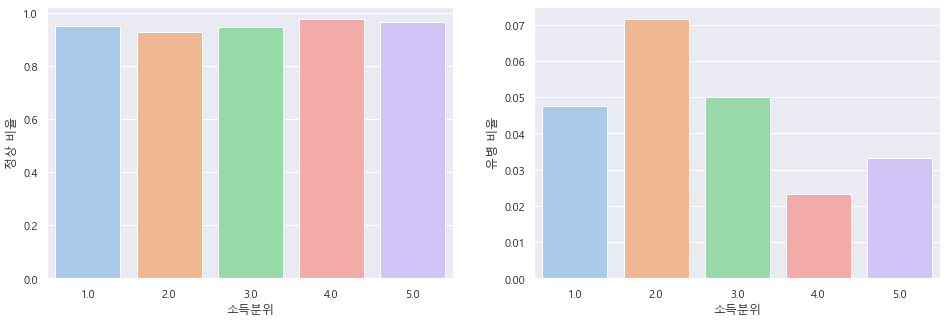

In [44]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DJ2_crosstab.index, y = DJ2_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DJ2_crosstab.index, y = DJ2_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [43]:
data19_DJ2 = pd.DataFrame(data19.DJ2_pr, data19.incm5)
data19_DJ2 = data19_DJ2.reset_index()
data19_DJ2['DJ2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DJ2_pr']]
data19_DJ2 = data19_DJ2.dropna()
[R1, p1] = stats.pearsonr(data19_DJ2.incm5, data19_DJ2.DJ2_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DJ2.incm5, data19_DJ2.DJ2_pr_needs)
print([R2, p2])

[-0.03285002067651539, 0.6858848595041102]
[-0.025872560771801972, 0.750100012176086]


폐결핵의 바이올린플롯 양상을 보았을 때 0 (폐결핵 발병하지 않음) 비율이 1 (폐결핵 발병함)보다 훨씬 많은 비중을 차지하고 있음을 알 수 있다. 따라서 폐결핵은 소득 구간과 상관없이 발병율이 그리 높지 않은 질병이라는 것을 알 수 있다. 또한 두 상관관계 검정 사이에서 p 값이 0.05보다 크므로 소득과 폐결핵 사이에는 관계가 없다.

## 8. 소득과 천식 유병 여부와의 관계

In [45]:
data19['DJ4_pr_needs'] = [np.nan if b > 1 else b for b in data19['DJ4_pr']]
data19.groupby('incm5')['DJ4_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,38.0,0.605263,0.495355,0.0,0.0,1.0,1.0,1.0
2.0,43.0,0.395349,0.494712,0.0,0.0,0.0,1.0,1.0
3.0,34.0,0.647059,0.485071,0.0,0.0,1.0,1.0,1.0
4.0,29.0,0.482759,0.508548,0.0,0.0,0.0,1.0,1.0
5.0,36.0,0.583333,0.500000,0.0,0.0,1.0,1.0,1.0


In [49]:
pd.crosstab(data19.incm5 ,data19.DJ4_pr_needs)

DJ4_pr_needs,0.0,1.0
incm5,,
1.0,15,23
2.0,26,17
3.0,12,22
4.0,15,14
5.0,15,21


In [50]:
DJ4_crosstab = pd.crosstab(data19.incm5 ,data19.DJ4_pr_needs, normalize = 'index')
DJ4_crosstab

DJ4_pr_needs,0.0,1.0
incm5,,
1.0,0.394737,0.605263
2.0,0.604651,0.395349
3.0,0.352941,0.647059
4.0,0.517241,0.482759
5.0,0.416667,0.583333


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

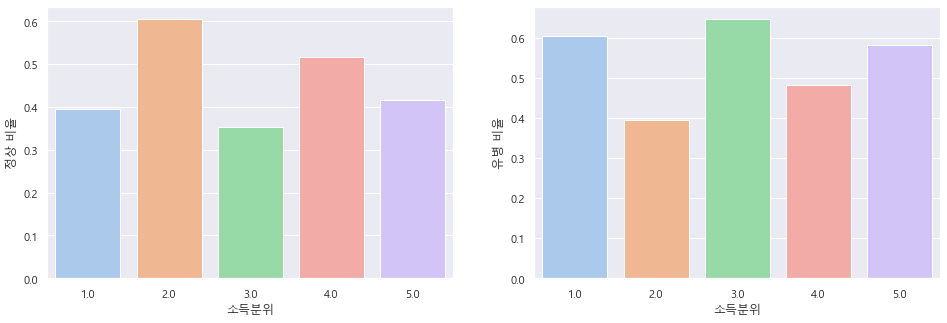

In [52]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DJ4_crosstab.index, y = DJ4_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DJ4_crosstab.index, y = DJ4_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [53]:
data19_DJ4 = pd.DataFrame(data19.DJ4_pr, data19.incm5)
data19_DJ4 = data19_DJ4.reset_index()
data19_DJ4['DJ4_pr_needs'] = [np.nan if b > 1 else b for b in data19['DJ4_pr']]
data19_DJ4 = data19_DJ4.dropna()
[R1, p1] = stats.pearsonr(data19_DJ4.incm5, data19_DJ4.DJ4_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DJ4.incm5, data19_DJ4.DJ4_pr_needs)
print([R2, p2])

[0.04390560512804571, 0.5924451832152273]
[0.04134784502319603, 0.6142021186541691]


소득 구간에 따라 특정한 양상이 보이지 않는 것으로 보이며 두 상관관계 검정에서도 p값이 0.05보다 크므로 천식과 소득간에는 관계가 없는 것으로 보인다.

## 9. 소득과 당뇨병 유병 여부와의 관계

In [55]:
data19['DE1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DE1_pr']]
data19.groupby('incm5')['DE1_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,133.0,0.969925,0.171440,0.0,1.0,1.0,1.0,1.0
2.0,137.0,0.970803,0.168976,0.0,1.0,1.0,1.0,1.0
3.0,106.0,0.971698,0.166622,0.0,1.0,1.0,1.0,1.0
4.0,124.0,0.983871,0.126483,0.0,1.0,1.0,1.0,1.0
5.0,123.0,0.951220,0.216290,0.0,1.0,1.0,1.0,1.0


In [56]:
pd.crosstab(data19.incm5 ,data19.DE1_pr_needs)

DE1_pr_needs,0.0,1.0
incm5,,
1.0,4,129
2.0,4,133
3.0,3,103
4.0,2,122
5.0,6,117


In [57]:
DE1_crosstab = pd.crosstab(data19.incm5 ,data19.DE1_pr_needs, normalize = 'index')
DE1_crosstab

DE1_pr_needs,0.0,1.0
incm5,,
1.0,0.030075,0.969925
2.0,0.029197,0.970803
3.0,0.028302,0.971698
4.0,0.016129,0.983871
5.0,0.048780,0.951220


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

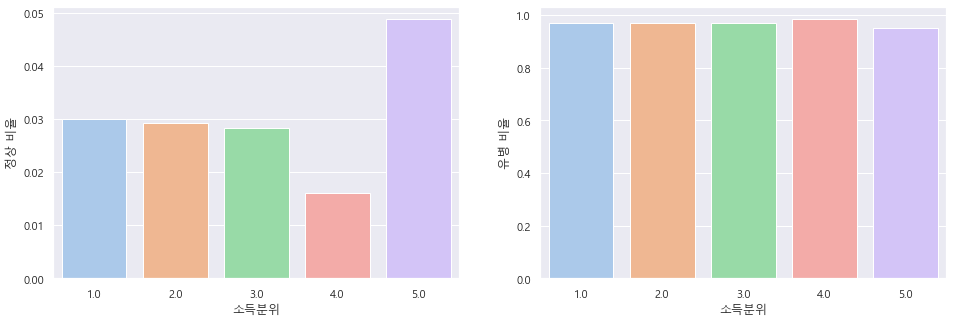

In [58]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DE1_crosstab.index, y = DE1_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DE1_crosstab.index, y = DE1_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [126]:
data19_DE1 = pd.DataFrame(data19.DE1_pr, data19.incm5)
data19_DE1 = data19_DE1.reset_index()
data19_DE1['DE1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DE1_pr']]
data19_DE1 = data19_DE1.dropna()
[R1, p1] = stats.pearsonr(data19_DE1.incm5, data19_DE1.DE1_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DE1.incm5, data19_DE1.DE1_pr_needs)
print([R2, p2])

[-0.03958908148924813, 0.3775166343512075]
[-0.03365319232282737, 0.45320500487755333]


1(발병함)의 비율이 0(발병하지 않음)의 비율에 비해 훨씬 크고 전체 소득 구간에서 발병 비율이 0.9 정도로 나타나는 것으로 보아 당뇨병의 발병율은 높은 질병임을 알 수 있다. 또한 모든 소득 구간에서 비슷한 비율을 보이고 있으며 두 상관관계 검정에서도 p값이 0.05보다 크므로 소득과 당뇨병 사이에는 관계가 없다고 할 수 있다.

## 10. 소득과 위암 유병 여부와의 관계

In [62]:
data19['DC1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC1_pr']]
data19.groupby('incm5')['DC1_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,7.0,0.285714,0.487950,0.0,0.0,0.0,0.5,1.0
2.0,13.0,0.307692,0.480384,0.0,0.0,0.0,1.0,1.0
3.0,12.0,0.166667,0.389249,0.0,0.0,0.0,0.0,1.0
4.0,11.0,0.272727,0.467099,0.0,0.0,0.0,0.5,1.0
5.0,11.0,0.454545,0.522233,0.0,0.0,0.0,1.0,1.0


In [63]:
pd.crosstab(data19.incm5 ,data19.DC1_pr_needs)

DC1_pr_needs,0.0,1.0
incm5,,
1.0,5,2
2.0,9,4
3.0,10,2
4.0,8,3
5.0,6,5


In [64]:
DC1_crosstab = pd.crosstab(data19.incm5 ,data19.DC1_pr_needs, normalize = 'index')
DC1_crosstab

DC1_pr_needs,0.0,1.0
incm5,,
1.0,0.714286,0.285714
2.0,0.692308,0.307692
3.0,0.833333,0.166667
4.0,0.727273,0.272727
5.0,0.545455,0.454545


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

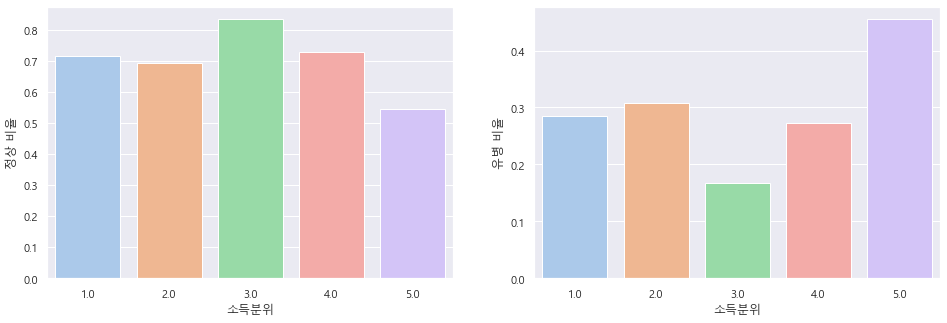

In [65]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DC1_crosstab.index, y = DC1_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DC1_crosstab.index, y = DC1_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [66]:
data19_DC1 = pd.DataFrame(data19.DC1_pr, data19.incm5)
data19_DC1 = data19_DC1.reset_index()
data19_DC1['DC1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC1_pr']]
data19_DC1 = data19_DC1.dropna()
[R1, p1] = stats.pearsonr(data19_DC1.incm5, data19_DC1.DC1_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DC1.incm5, data19_DC1.DC1_pr_needs)
print([R2, p2])

[0.12690868125759028, 0.4173885417916682]
[0.08885177679975567, 0.5709900950164183]


1분위에서 4분위까지는 20%~30%의 비율을 보이고 있지만 5분위에서 비율이 증가하는 것을 볼 수 있다. 또한 두 상관관계 검정 사이에서 p값이 0.05보다 크므로 소득과 위암 간에는 관계가 없음을 알 수 있다.

## 11. 소득과 간암 유병 여부와의 관계

In [68]:
data19['DC2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC2_pr']]
data19.groupby('incm5')['DC2_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,2.0,1.0,0.000000,1.0,1.00,1.0,1.00,1.0
2.0,2.0,0.5,0.707107,0.0,0.25,0.5,0.75,1.0
3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,1.0,1.0,NaN,1.0,1.00,1.0,1.00,1.0


In [69]:
pd.crosstab(data19.incm5 ,data19.DC2_pr_needs)

DC2_pr_needs,0.0,1.0
incm5,,
1.0,0,2
2.0,1,1
5.0,0,1


In [70]:
DC2_crosstab = pd.crosstab(data19.incm5 ,data19.DC2_pr_needs, normalize = 'index')
DC2_crosstab

DC2_pr_needs,0.0,1.0
incm5,,
1.0,0.0,1.0
2.0,0.5,0.5
5.0,0.0,1.0


데이터셋 상에서 자료가 부족하여 소득과 간암과의 관계를 특정하기 어렵다.

## 12. 소득과 대장암 유병 여부와의 관계

In [74]:
data19['DC3_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC3_pr']]
data19.groupby('incm5')['DC3_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,5.0,0.200000,0.447214,0.0,0.0,0.0,0.00,1.0
2.0,5.0,0.400000,0.547723,0.0,0.0,0.0,1.00,1.0
3.0,19.0,0.210526,0.418854,0.0,0.0,0.0,0.00,1.0
4.0,3.0,0.333333,0.577350,0.0,0.0,0.0,0.50,1.0
5.0,12.0,0.250000,0.452267,0.0,0.0,0.0,0.25,1.0


In [75]:
pd.crosstab(data19.incm5 ,data19.DC3_pr_needs)

DC3_pr_needs,0.0,1.0
incm5,,
1.0,4,1
2.0,3,2
3.0,15,4
4.0,2,1
5.0,9,3


In [76]:
DC3_crosstab = pd.crosstab(data19.incm5 ,data19.DC3_pr_needs, normalize = 'index')
DC3_crosstab

DC3_pr_needs,0.0,1.0
incm5,,
1.0,0.800000,0.200000
2.0,0.600000,0.400000
3.0,0.789474,0.210526
4.0,0.666667,0.333333
5.0,0.750000,0.250000


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

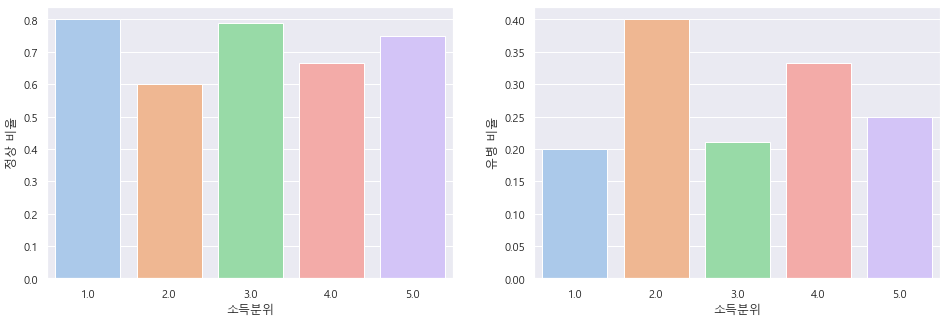

In [77]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DC3_crosstab.index, y = DC3_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DC3_crosstab.index, y = DC3_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [78]:
data19_DC3 = pd.DataFrame(data19.DC3_pr, data19.incm5)
data19_DC3 = data19_DC3.reset_index()
data19_DC3['DC3_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC3_pr']]
data19_DC3 = data19_DC3.dropna()
[R1, p1] = stats.pearsonr(data19_DC3.incm5, data19_DC3.DC3_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DC3.incm5, data19_DC3.DC3_pr_needs)
print([R2, p2])

[-0.008420026430504442, 0.9583310705865695]
[-0.023127825372509122, 0.8858718813930849]


소득 구간 별로 대장암 유병 비율이 들쭉날쭉하기도 하고 두 상관관계 검정에서 p값이 1에 가까운 값이 나왔으므로 소득과 대장암 발병은 관계가 없어 보인다.

## 13. 소득과 유방암 유병 여부와의 관계

In [82]:
data19['DC4_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC4_pr']]
data19.groupby('incm5')['DC4_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,8.0,0.625000,0.517549,0.0,0.0,1.0,1.0,1.0
2.0,9.0,0.444444,0.527046,0.0,0.0,0.0,1.0,1.0
3.0,10.0,0.800000,0.421637,0.0,1.0,1.0,1.0,1.0
4.0,18.0,0.500000,0.514496,0.0,0.0,0.5,1.0,1.0
5.0,14.0,0.571429,0.513553,0.0,0.0,1.0,1.0,1.0


In [83]:
pd.crosstab(data19.incm5 ,data19.DC4_pr_needs)

DC4_pr_needs,0.0,1.0
incm5,,
1.0,3,5
2.0,5,4
3.0,2,8
4.0,9,9
5.0,6,8


In [84]:
DC4_crosstab = pd.crosstab(data19.incm5 ,data19.DC4_pr_needs, normalize = 'index')
DC4_crosstab

DC4_pr_needs,0.0,1.0
incm5,,
1.0,0.375000,0.625000
2.0,0.555556,0.444444
3.0,0.200000,0.800000
4.0,0.500000,0.500000
5.0,0.428571,0.571429


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

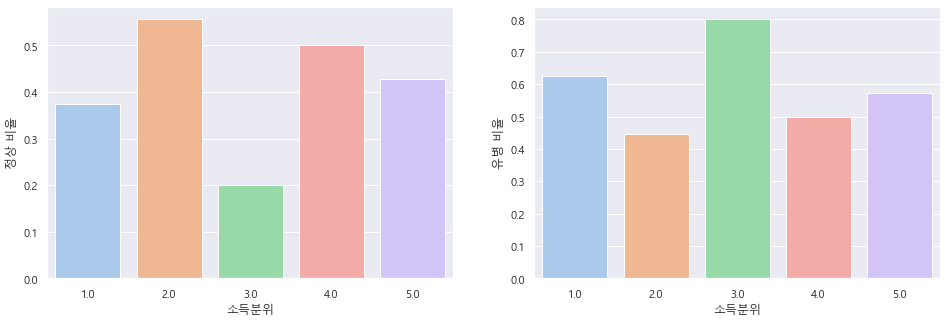

In [85]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DC4_crosstab.index, y = DC4_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DC4_crosstab.index, y = DC4_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [86]:
data19_DC4 = pd.DataFrame(data19.DC4_pr, data19.incm5)
data19_DC4 = data19_DC4.reset_index()
data19_DC4['DC4_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC4_pr']]
data19_DC4 = data19_DC4.dropna()
[R1, p1] = stats.pearsonr(data19_DC4.incm5, data19_DC4.DC4_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DC4.incm5, data19_DC4.DC4_pr_needs)
print([R2, p2])

[0.005556255556258383, 0.9724964806814415]
[0.024123621963474652, 0.8809924093269188]


3분위에서 80%로 가장 많은 비율을 차지하고 있는 것을 볼 수 있다. 또 두 상관관계 검정 상에서 p값이 1에 가까운 값이 나오며 소득과 유방암과의 관계는 없음을 알 수 있다.

## 14. 소득과 자궁경부암 유병 여부와의 관계

In [87]:
data19['DC5_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC5_pr']]
data19.groupby('incm5')['DC5_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
2.0,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3.0,3.0,0.666667,0.577350,0.0,0.5,1.0,1.0,1.0
4.0,3.0,0.333333,0.577350,0.0,0.0,0.0,0.5,1.0
5.0,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [88]:
pd.crosstab(data19.incm5 ,data19.DC5_pr_needs)

DC5_pr_needs,0.0,1.0
incm5,,
1.0,4,1
2.0,6,0
3.0,1,2
4.0,2,1
5.0,5,0


In [89]:
DC5_crosstab = pd.crosstab(data19.incm5 ,data19.DC5_pr_needs, normalize = 'index')
DC5_crosstab

DC5_pr_needs,0.0,1.0
incm5,,
1.0,0.800000,0.200000
2.0,1.000000,0.000000
3.0,0.333333,0.666667
4.0,0.666667,0.333333
5.0,1.000000,0.000000


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

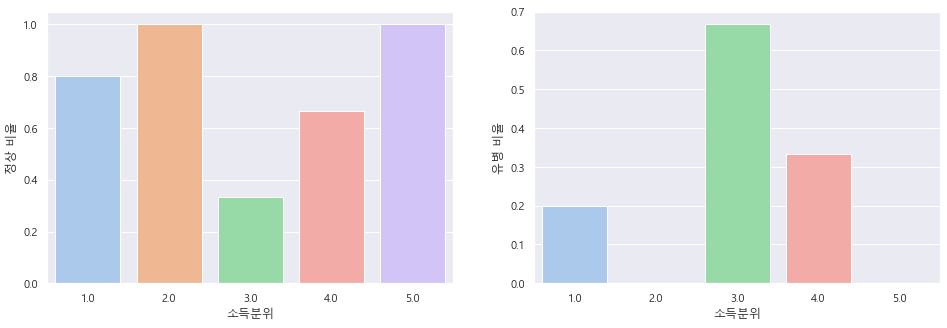

In [90]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DC5_crosstab.index, y = DC5_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DC5_crosstab.index, y = DC5_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [131]:
data19_DC5 = pd.DataFrame(data19.DC5_pr, data19.incm5)
data19_DC5 = data19_DC5.reset_index()
data19_DC5['DC5_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC5_pr']]
data19_DC5 = data19_DC5.dropna()
[R1, p1] = stats.pearsonr(data19_DC5.incm5, data19_DC5.DC5_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DC5.incm5, data19_DC5.DC5_pr_needs)
print([R2, p2])

[-0.0997211705387564, 0.6846103915707656]
[-0.02731577254022032, 0.9116136308043157]


표본집단의 크기가 작기도 하고 두 상관관계 검정 상에서 p값이 0.05보다 크므로 소득과 자궁경부암은 관계가 없음을 알 수 있다.

## 15. 소득과 폐암 유병 여부와의 관계

In [91]:
data19['DC6_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC6_pr']]
data19.groupby('incm5')['DC6_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,6.0,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
2.0,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
3.0,3.0,0.666667,0.577350,0.0,0.50,1.0,1.00,1.0
4.0,5.0,0.600000,0.547723,0.0,0.00,1.0,1.00,1.0
5.0,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0


In [92]:
pd.crosstab(data19.incm5 ,data19.DC6_pr_needs)

DC6_pr_needs,0.0,1.0
incm5,,
1.0,3,3
2.0,1,1
3.0,1,2
4.0,2,3
5.0,1,1


In [93]:
DC6_crosstab = pd.crosstab(data19.incm5 ,data19.DC6_pr_needs, normalize = 'index')
DC6_crosstab

DC6_pr_needs,0.0,1.0
incm5,,
1.0,0.500000,0.500000
2.0,0.500000,0.500000
3.0,0.333333,0.666667
4.0,0.400000,0.600000
5.0,0.500000,0.500000


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

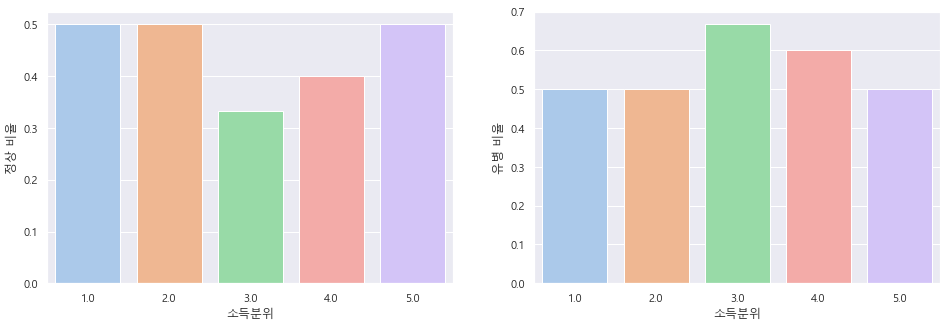

In [94]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DC6_crosstab.index, y = DC6_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DC6_crosstab.index, y = DC6_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [95]:
data19_DC6 = pd.DataFrame(data19.DC6_pr, data19.incm5)
data19_DC6 = data19_DC6.reset_index()
data19_DC6['DC6_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC6_pr']]
data19_DC6 = data19_DC6.dropna()
[R1, p1] = stats.pearsonr(data19_DC6.incm5, data19_DC6.DC6_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DC6.incm5, data19_DC6.DC6_pr_needs)
print([R2, p2])

[0.04171884786014654, 0.8923587759101245]
[0.06566773344859698, 0.8312180384957017]


표본집단의 크기가 작기도 하고 각 소득 구간마다 비율이 비슷하다는 것을 볼 수 있다. 또한 두 상관관계 검정 상에서도 p값이 0.05보다 훨씬 크게 나오며 소득과 폐암 유병 여부는 관계가 없는 것을 알 수 있다.

## 16. 소득과 갑상선암 유병 여부의 관계

In [96]:
data19['DC7_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC7_pr']]
data19.groupby('incm5')['DC7_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,11.0,0.545455,0.522233,0.0,0.0,1.0,1.0,1.0
2.0,22.0,0.545455,0.509647,0.0,0.0,1.0,1.0,1.0
3.0,16.0,0.437500,0.512348,0.0,0.0,0.0,1.0,1.0
4.0,10.0,0.400000,0.516398,0.0,0.0,0.0,1.0,1.0
5.0,17.0,0.117647,0.332106,0.0,0.0,0.0,0.0,1.0


In [155]:
pd.crosstab(data19.incm5 ,data19.DC7_pr_needs)

DC7_pr_needs,0.0,1.0
incm5,,
1.0,5,6
2.0,10,12
3.0,9,7
4.0,6,4
5.0,15,2


In [97]:
DC7_crosstab = pd.crosstab(data19.incm5 ,data19.DC7_pr_needs, normalize = 'index')
DC7_crosstab

DC7_pr_needs,0.0,1.0
incm5,,
1.0,0.454545,0.545455
2.0,0.454545,0.545455
3.0,0.562500,0.437500
4.0,0.600000,0.400000
5.0,0.882353,0.117647


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

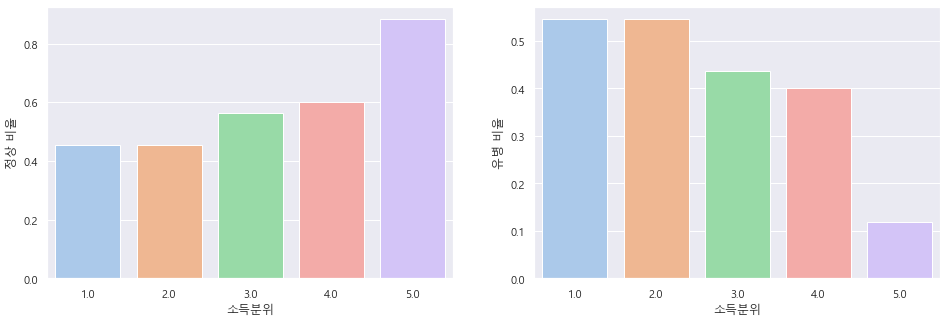

In [160]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DC7_crosstab.index, y = DC7_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DC7_crosstab.index, y = DC7_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [104]:
data19_DC7 = pd.DataFrame(data19.DC7_pr, data19.incm5)
data19_DC7 = data19_DC7.reset_index()
data19_DC7['DC7_pr_needs'] = [np.nan if b > 1 else b for b in data19['DC7_pr']]
data19_DC7 = data19_DC7.dropna()
[R1, p1] = stats.pearsonr(data19_DC7.incm5, data19_DC7.DC7_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DC7.incm5, data19_DC7.DC7_pr_needs)
print([R2, p2])

[-0.34603500869495074, 0.004427489592025152]
[-0.3225481154820645, 0.008258210069993988]


<AxesSubplot:xlabel='incm5', ylabel='DC7_pr_needs'>

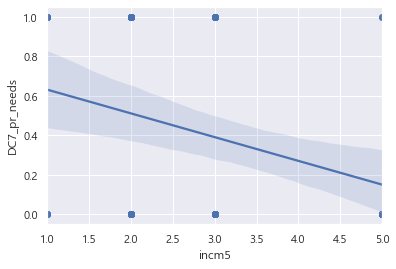

In [105]:
sns.regplot(data = data19_DC7, x = 'incm5', y = 'DC7_pr_needs')

갑상선암은 소득이 늘어날 수록 갑상선암에 걸린 환자의 비율이 감소하는 양상을 보인다. 또한 두 상관관계 검정 상에서도 p값이 0.05보다 작은 값을 보이므로 소득과 갑상선암 사이에는 유의미한 관계가 있음을 알 수 있다. 이를 기반으로 regplot을 사용하여 나타내주었더니 우하향하는 그래프가 나타난 것을 볼 수 있다.

## 17. 소득과 갑상선 질환과의 관계

In [98]:
data19['DE2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DE2_pr']]
data19.groupby('incm5')['DE2_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,41.0,0.585366,0.498779,0.0,0.0,1.0,1.0,1.0
2.0,41.0,0.731707,0.448575,0.0,0.0,1.0,1.0,1.0
3.0,45.0,0.511111,0.505525,0.0,0.0,1.0,1.0,1.0
4.0,56.0,0.571429,0.499350,0.0,0.0,1.0,1.0,1.0
5.0,53.0,0.641509,0.484146,0.0,0.0,1.0,1.0,1.0


In [99]:
pd.crosstab(data19.incm5 ,data19.DE2_pr_needs)

DE2_pr_needs,0.0,1.0
incm5,,
1.0,17,24
2.0,11,30
3.0,22,23
4.0,24,32
5.0,19,34


In [101]:
DE2_crosstab = pd.crosstab(data19.incm5 ,data19.DE2_pr_needs, normalize = 'index')
DE2_crosstab

DE2_pr_needs,0.0,1.0
incm5,,
1.0,0.414634,0.585366
2.0,0.268293,0.731707
3.0,0.488889,0.511111
4.0,0.428571,0.571429
5.0,0.358491,0.641509


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

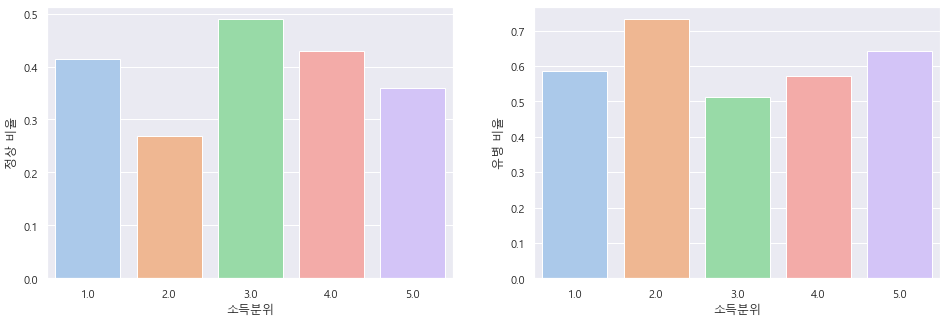

In [102]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DE2_crosstab.index, y = DE2_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DE2_crosstab.index, y = DE2_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [103]:
data19_DE2 = pd.DataFrame(data19.DE2_pr, data19.incm5)
data19_DE2 = data19_DE2.reset_index()
data19_DE2['DE2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DE2_pr']]
data19_DE2 = data19_DE2.dropna()
[R1, p1] = stats.pearsonr(data19_DE2.incm5, data19_DE2.DE2_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DE2.incm5, data19_DE2.DE2_pr_needs)
print([R2, p2])

[0.0036355207131301137, 0.9613687843340671]
[-0.006935486048140224, 0.9263785158640907]


1, 3, 4분위는 비슷한 비율을 보이나 2분위에서 가장 높은 비율을 보인다. 또한 두 상관관계 검정 상에서 p값이 1에 가까운 값을 보이며 소득과 갑상선 질환과의 관계는 없음을 알 수 있다.

## 18. 소득과 우울증의 관계

In [104]:
data19['DF2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DF2_pr']]
data19.groupby('incm5')['DF2_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,89.0,0.741573,0.440250,0.0,0.0,1.0,1.0,1.0
2.0,61.0,0.606557,0.492568,0.0,0.0,1.0,1.0,1.0
3.0,56.0,0.428571,0.499350,0.0,0.0,0.0,1.0,1.0
4.0,45.0,0.400000,0.495434,0.0,0.0,0.0,1.0,1.0
5.0,37.0,0.378378,0.491672,0.0,0.0,0.0,1.0,1.0


In [105]:
pd.crosstab(data19.incm5 ,data19.DF2_pr_needs)

DF2_pr_needs,0.0,1.0
incm5,,
1.0,23,66
2.0,24,37
3.0,32,24
4.0,27,18
5.0,23,14


In [106]:
DF2_crosstab = pd.crosstab(data19.incm5 ,data19.DF2_pr_needs, normalize = 'index')
DF2_crosstab

DF2_pr_needs,0.0,1.0
incm5,,
1.0,0.258427,0.741573
2.0,0.393443,0.606557
3.0,0.571429,0.428571
4.0,0.600000,0.400000
5.0,0.621622,0.378378


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

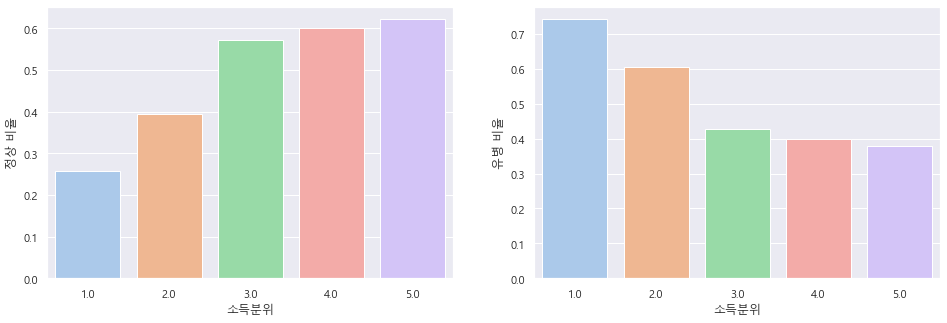

In [107]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DF2_crosstab.index, y = DF2_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DF2_crosstab.index, y = DF2_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [108]:
data19_DF2 = pd.DataFrame(data19.DF2_pr, data19.incm5)
data19_DF2 = data19_DF2.reset_index()
data19_DF2['DF2_pr_needs'] = [np.nan if b > 1 else b for b in data19['DF2_pr']]
data19_DF2 = data19_DF2.dropna()
[R1, p1] = stats.pearsonr(data19_DF2.incm5, data19_DF2.DF2_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DF2.incm5, data19_DF2.DF2_pr_needs)
print([R2, p2])

[-0.276420081000492, 1.2298161330771943e-05]
[-0.292344006348613, 3.5632040895113546e-06]


<AxesSubplot:xlabel='incm5', ylabel='DF2_pr_needs'>

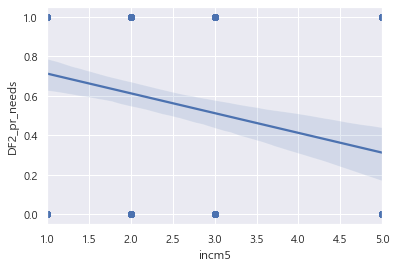

In [109]:
sns.regplot(data = data19_DF2, x = 'incm5', y = 'DF2_pr_needs')

두 상관관계 검정에서 p값이 0.05보다 작게 나온 것으로 보아 소득이 작을수록 우울증 발병 비율이 높아지는 것을 알 수 있다. 또한 regplot 상에서도 우하향하는 그래프를 확인할 수 있다.

## 19. 소득과 알레르기 비염과의 관계

In [110]:
data19['DJ8_pr_needs'] = [np.nan if b > 1 else b for b in data19['DJ8_pr']]
data19.groupby('incm5')['DJ8_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,195.0,0.810256,0.393107,0.0,1.0,1.0,1.0,1.0
2.0,174.0,0.816092,0.388527,0.0,1.0,1.0,1.0,1.0
3.0,169.0,0.840237,0.367475,0.0,1.0,1.0,1.0,1.0
4.0,161.0,0.819876,0.385490,0.0,1.0,1.0,1.0,1.0
5.0,180.0,0.805556,0.396876,0.0,1.0,1.0,1.0,1.0


In [111]:
pd.crosstab(data19.incm5 ,data19.DJ8_pr_needs)

DJ8_pr_needs,0.0,1.0
incm5,,
1.0,37,158
2.0,32,142
3.0,27,142
4.0,29,132
5.0,35,145


In [112]:
DJ8_crosstab = pd.crosstab(data19.incm5 ,data19.DJ8_pr_needs, normalize = 'index')
DJ8_crosstab

DJ8_pr_needs,0.0,1.0
incm5,,
1.0,0.189744,0.810256
2.0,0.183908,0.816092
3.0,0.159763,0.840237
4.0,0.180124,0.819876
5.0,0.194444,0.805556


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

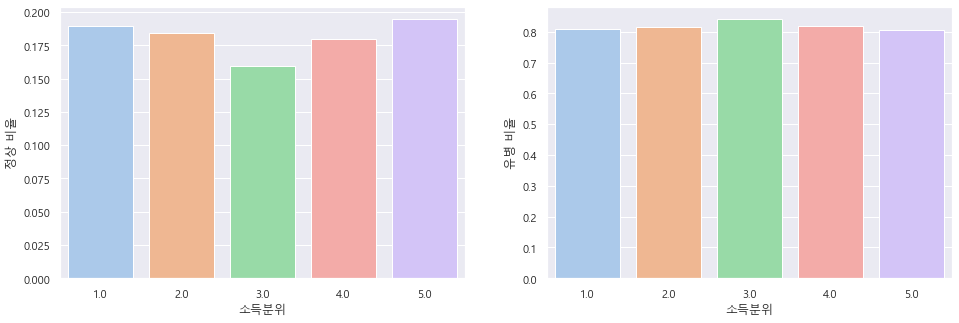

In [113]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DJ8_crosstab.index, y = DJ8_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DJ8_crosstab.index, y = DJ8_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [136]:
data19_DJ8 = pd.DataFrame(data19.DJ8_pr, data19.incm5)
data19_DJ8 = data19_DJ8.reset_index()
data19_DJ8['DJ8_pr_needs'] = [np.nan if b > 1 else b for b in data19['DJ8_pr']]
data19_DJ8 = data19_DJ8.dropna()
[R1, p1] = stats.pearsonr(data19_DJ8.incm5, data19_DJ8.DJ8_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DJ8.incm5, data19_DJ8.DJ8_pr_needs)
print([R2, p2])

[-0.0029326569720392244, 0.9374738195040783]
[0.0031095809908972686, 0.9337101089427606]


전 소득 구간에서 0.8 정도의 비율을 보이고 있고 두 상관관계 검정 상에서도 p값이 1에 가까운 값을 보이며 알레르기 비염과 소득은 관계가 없다는 것을 알 수 있다.

## 20. 소득과 신부전 발병의 관계

In [114]:
data19['DN1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DN1_pr']]
data19.groupby('incm5')['DN1_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,4.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
2.0,5.0,0.800000,0.447214,0.0,1.00,1.0,1.0,1.0
3.0,8.0,0.625000,0.517549,0.0,0.00,1.0,1.0,1.0
4.0,4.0,0.750000,0.500000,0.0,0.75,1.0,1.0,1.0
5.0,3.0,0.666667,0.577350,0.0,0.50,1.0,1.0,1.0


In [115]:
pd.crosstab(data19.incm5 ,data19.DN1_pr_needs)

DN1_pr_needs,0.0,1.0
incm5,,
1.0,0,4
2.0,1,4
3.0,3,5
4.0,1,3
5.0,1,2


In [116]:
DN1_crosstab = pd.crosstab(data19.incm5 ,data19.DN1_pr_needs, normalize = 'index')
DN1_crosstab

DN1_pr_needs,0.0,1.0
incm5,,
1.0,0.000000,1.000000
2.0,0.200000,0.800000
3.0,0.375000,0.625000
4.0,0.250000,0.750000
5.0,0.333333,0.666667


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

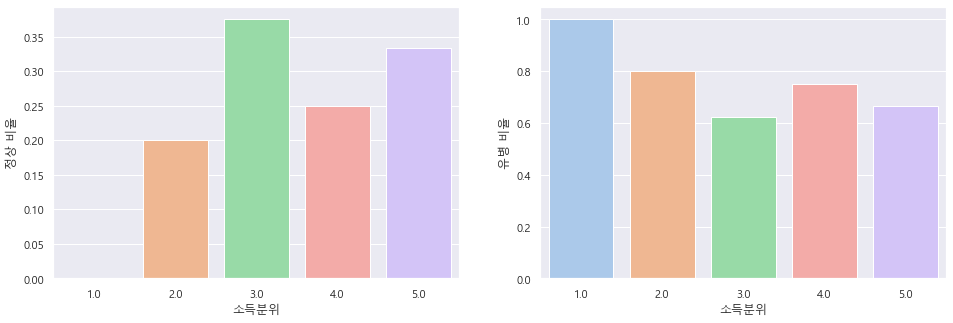

In [117]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DN1_crosstab.index, y = DN1_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DN1_crosstab.index, y = DN1_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [118]:
data19_DN1 = pd.DataFrame(data19.DN1_pr, data19.incm5)
data19_DN1 = data19_DN1.reset_index()
data19_DN1['DN1_pr_needs'] = [np.nan if b > 1 else b for b in data19['DN1_pr']]
data19_DN1 = data19_DN1.dropna()
[R1, p1] = stats.pearsonr(data19_DN1.incm5, data19_DN1.DN1_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DN1.incm5, data19_DN1.DN1_pr_needs)
print([R2, p2])

[-0.25692800972687846, 0.27416565120915865]
[-0.2936811619128579, 0.20884356404706944]


데이터셋 상에서의 분포는 소득 구간이 낮을수록 신부전 발병율이 높아진다는 결과를 보이지만 상관관계 검정 결과 p 값이 0.05보다 크게 나오므로 소득과 신부전 사이에는 관계가 없음을 알 수 있다.

## 21. 소득과 통풍 발병의 관계

In [119]:
data19['DM8_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM8_pr']]
data19.groupby('incm5')['DM8_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,25.0,0.680000,0.476095,0.0,0.00,1.0,1.0,1.0
2.0,17.0,0.647059,0.492592,0.0,0.00,1.0,1.0,1.0
3.0,22.0,0.590909,0.503236,0.0,0.00,1.0,1.0,1.0
4.0,18.0,0.722222,0.460889,0.0,0.25,1.0,1.0,1.0
5.0,22.0,0.590909,0.503236,0.0,0.00,1.0,1.0,1.0


In [120]:
pd.crosstab(data19.incm5 ,data19.DM8_pr_needs)

DM8_pr_needs,0.0,1.0
incm5,,
1.0,8,17
2.0,6,11
3.0,9,13
4.0,5,13
5.0,9,13


In [121]:
DM8_crosstab = pd.crosstab(data19.incm5 ,data19.DM8_pr_needs, normalize = 'index')
DM8_crosstab

DM8_pr_needs,0.0,1.0
incm5,,
1.0,0.320000,0.680000
2.0,0.352941,0.647059
3.0,0.409091,0.590909
4.0,0.277778,0.722222
5.0,0.409091,0.590909


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

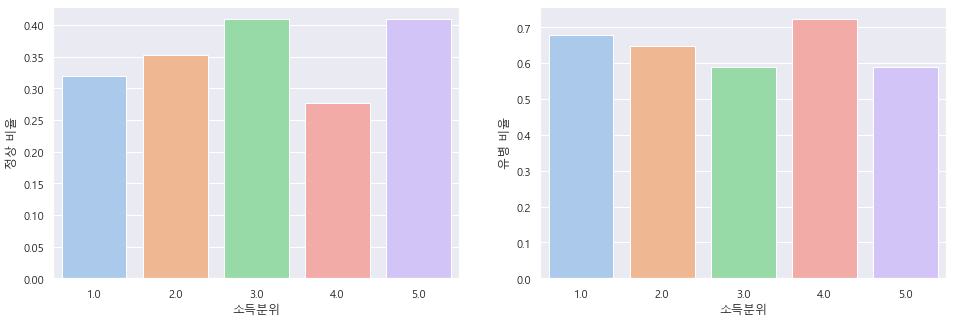

In [122]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DM8_crosstab.index, y = DM8_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DM8_crosstab.index, y = DM8_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [123]:
data19_DM8 = pd.DataFrame(data19.DM8_pr, data19.incm5)
data19_DM8 = data19_DM8.reset_index()
data19_DM8['DM8_pr_needs'] = [np.nan if b > 1 else b for b in data19['DM8_pr']]
data19_DM8 = data19_DM8.dropna()
[R1, p1] = stats.pearsonr(data19_DM8.incm5, data19_DM8.DM8_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DM8.incm5, data19_DM8.DM8_pr_needs)
print([R2, p2])

[-0.07211131984179815, 0.50937765593944]
[-0.07719414145222293, 0.4799090590127858]


1분위에서 3분위까지는 감소하는 양상을 보이나 4분위에서 갑자기 증가하는 양상을 보이고 있다. 또한 두 상관관계 검정 상에서 p값이 0.05보다 큰 값을 보이므로 소득과 통풍은 관계가 없다.

## 22. 소득과 B형간염 발병의 관계

In [124]:
data19['DK8_pr_needs'] = [np.nan if b > 1 else b for b in data19['DK8_pr']]
data19.groupby('incm5')['DK8_pr_needs'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,17.0,0.411765,0.507300,0.0,0.0,0.0,1.00,1.0
2.0,14.0,0.285714,0.468807,0.0,0.0,0.0,0.75,1.0
3.0,13.0,0.538462,0.518875,0.0,0.0,1.0,1.00,1.0
4.0,10.0,0.400000,0.516398,0.0,0.0,0.0,1.00,1.0
5.0,14.0,0.428571,0.513553,0.0,0.0,0.0,1.00,1.0


In [125]:
pd.crosstab(data19.incm5 ,data19.DK8_pr_needs)

DK8_pr_needs,0.0,1.0
incm5,,
1.0,10,7
2.0,10,4
3.0,6,7
4.0,6,4
5.0,8,6


In [126]:
DK8_crosstab = pd.crosstab(data19.incm5 ,data19.DK8_pr_needs, normalize = 'index')
DK8_crosstab

DK8_pr_needs,0.0,1.0
incm5,,
1.0,0.588235,0.411765
2.0,0.714286,0.285714
3.0,0.461538,0.538462
4.0,0.600000,0.400000
5.0,0.571429,0.428571


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

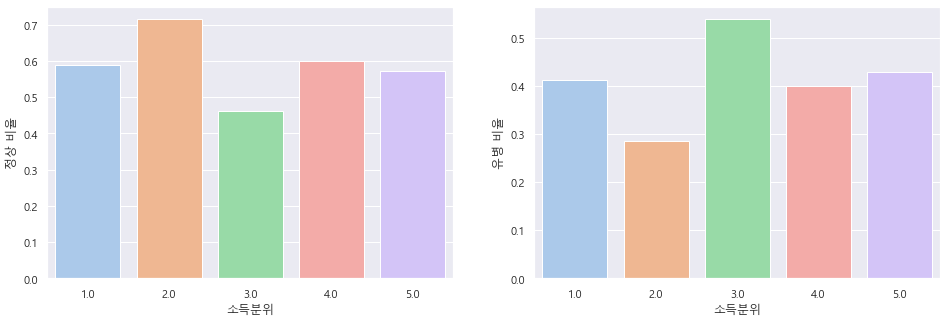

In [127]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = DK8_crosstab.index, y = DK8_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = DK8_crosstab.index, y = DK8_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [128]:
data19_DK8 = pd.DataFrame(data19.DK8_pr, data19.incm5)
data19_DK8 = data19_DK8.reset_index()
data19_DK8['DK8_pr_needs'] = [np.nan if b > 1 else b for b in data19['DK8_pr']]
data19_DK8 = data19_DK8.dropna()
[R1, p1] = stats.pearsonr(data19_DK8.incm5, data19_DK8.DK8_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_DK8.incm5, data19_DK8.DK8_pr_needs)
print([R2, p2])

[0.052991693363712525, 0.6927947523732104]
[0.0605298336179854, 0.6517295692878581]


2분위에서 가장 낮은 비율을 보이기는 하나 나머지 비율 또한 비슷하거나 조금 큰 차이를 보임을 알 수 있다. 또한 두 상관관계 검정 상에서 p값이 0.05보다 큰 것으로 보아 소득과 B형 간염 사이에는 관계가 없어 보인다.

## 23. 소득과 비만과의 관계

BMI 지수 별로 나누어 계산해주었다.
BMI < 20 : 저체중, 20 <= BMI <25 : 정상, 25 <= BMI < 30 : 경도비만, BMI >= 30 : 비만 으로 봐주었다.

In [130]:
data19['obesity'] = ['Obese' if b >= 30 else ('Overweight' if 25 <= b < 30  else ('Normal' if 20 <= b < 25 else 'Underweight')) for b in data19['HE_BMI']]
data19['obesity']

0        Overweight
1       Underweight
2       Underweight
3        Overweight
4       Underweight
           ...     
8105         Normal
8106         Normal
8107    Underweight
8108    Underweight
8109    Underweight
Name: obesity, Length: 8110, dtype: object

In [131]:
data19['obese'] = [1 if b >= 25 else 0 for b in data19['HE_BMI']]
data19.groupby('incm5')['obese'].describe()

,count,mean,std,min,25%,50%,75%,max
incm5,,,,,,,,
1.0,1626.0,0.287208,0.452599,0.0,0.0,0.0,1.0,1.0
2.0,1603.0,0.280724,0.449493,0.0,0.0,0.0,1.0,1.0
3.0,1621.0,0.272054,0.445155,0.0,0.0,0.0,1.0,1.0
4.0,1617.0,0.276438,0.447374,0.0,0.0,0.0,1.0,1.0
5.0,1603.0,0.262633,0.440202,0.0,0.0,0.0,1.0,1.0


In [132]:
pd.crosstab(data19.incm5 ,data19.obese)

obese,0,1
incm5,,
1.0,1159,467
2.0,1153,450
3.0,1180,441
4.0,1170,447
5.0,1182,421


In [133]:
obese_crosstab = pd.crosstab(data19.incm5 ,data19.obese, normalize = 'index')
obese_crosstab

obese,0,1
incm5,,
1.0,0.712792,0.287208
2.0,0.719276,0.280724
3.0,0.727946,0.272054
4.0,0.723562,0.276438
5.0,0.737367,0.262633


(Text(0.5, 0, '소득분위'), Text(0, 0.5, '유병 비율'))

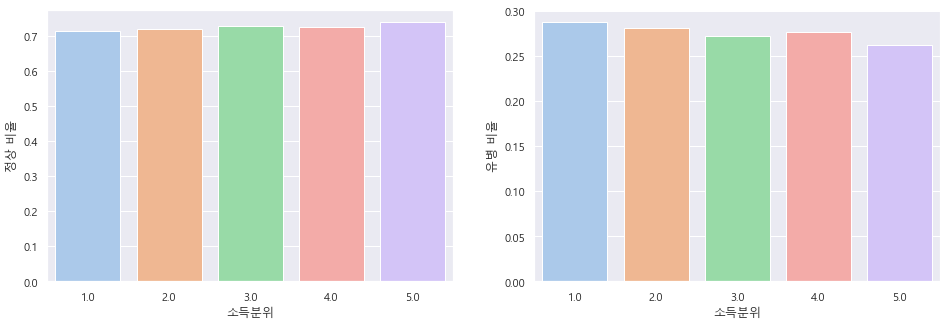

In [134]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(16, 5))

plt.subplot(121)
sns.barplot(x = obese_crosstab.index, y = obese_crosstab[0.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('정상 비율')

plt.subplot(122)
sns.barplot(x = obese_crosstab.index, y = obese_crosstab[1.0], palette = 'pastel')
plt.xlabel('소득분위'), plt.ylabel('유병 비율')

In [135]:
data19_obese = pd.DataFrame(data19.obese, data19.incm5)
data19_obese = data19_obese.reset_index()
data19_obese['obese_pr_needs'] = [np.nan if b > 1 else b for b in data19['obese']]
data19_obese = data19_obese.dropna()
[R1, p1] = stats.pearsonr(data19_obese.incm5, data19_obese.obese_pr_needs)
print([R1, p1])
[R2, p2] = stats.spearmanr(data19_obese.incm5, data19_obese.obese_pr_needs)
print([R2, p2])

[-0.0168964412136825, 0.1290814105495174]
[-0.016891025102284348, 0.1292041680569789]


전 소득분위에서 약 0.3정도의 비율이 나오고 있고 두 상관관계 검정에서 p값이 0.05보다 큰 값이 나오므로 소득과 비만율은 관계가 없는 것으로 보인다.

# 2010~ 2019년 국민건강영양조사 csv를 사용하여 시간에 따른 소득과 질병 유병 여부 사이의 관계 변화 알아보기

유의미한 관계를 보인 질병들(우울증, 갑상선암)을 기준으로 시간의 흐름에 따라 관계를 파악해보았다.

In [137]:
plt.rc('font', family='Malgun Gothic')

In [138]:
data10 = pd.read_csv('hn10_all.csv', encoding = 'cp949', low_memory = False)
data11 = pd.read_csv('hn11_all.csv', encoding = 'cp949', low_memory = False)
data12 = pd.read_csv('hn12_all.csv', encoding = 'cp949', low_memory = False)
data13 = pd.read_csv('hn13_all.csv', encoding = 'cp949', low_memory = False)
data14 = pd.read_csv('hn14_all.csv', encoding = 'cp949', low_memory = False)

In [139]:
data15 = pd.read_csv('hn15_all.csv', encoding = 'cp949', low_memory = False)
data16 = pd.read_csv('hn16_all.csv', encoding = 'cp949', low_memory = False)
data17 = pd.read_csv('hn17_all.csv', encoding = 'cp949', low_memory = False)
data18 = pd.read_csv('hn18_all.csv', encoding = 'cp949', low_memory = False)
data19 = pd.read_csv('hn19_all.csv', encoding = 'cp949', low_memory = False)

## 시간에 따른 소득과 우울증 발병 사이의 관계 변화

In [140]:
data10['DF2_pr_needs10'] = [np.nan if b > 1 else b for b in data10['DF2_pr']]
data11['DF2_pr_needs11'] = [np.nan if b > 1 else b for b in data11['DF2_pr']]
data12['DF2_pr_needs12'] = [np.nan if b > 1 else b for b in data12['DF2_pr']]
data13['DF2_pr_needs13'] = [np.nan if b > 1 else b for b in data13['DF2_pr']]
data14['DF2_pr_needs14'] = [np.nan if b > 1 else b for b in data14['DF2_pr']]
data15['DF2_pr_needs15'] = [np.nan if b > 1 else b for b in data15['DF2_pr']]
data16['DF2_pr_needs16'] = [np.nan if b > 1 else b for b in data16['DF2_pr']]
data17['DF2_pr_needs17'] = [np.nan if b > 1 else b for b in data17['DF2_pr']]
data18['DF2_pr_needs18'] = [np.nan if b > 1 else b for b in data18['DF2_pr']]
data19['DF2_pr_needs19'] = [np.nan if b > 1 else b for b in data19['DF2_pr']]
DF2_ratio10 = pd.DataFrame(data10.dropna(subset = ['DF2_pr_needs10']).groupby('incm5')['DF2_pr_needs10'].mean())
DF2_ratio11 = pd.DataFrame(data11.dropna(subset = ['DF2_pr_needs11']).groupby('incm5')['DF2_pr_needs11'].mean())
DF2_ratio12 = pd.DataFrame(data12.dropna(subset = ['DF2_pr_needs12']).groupby('incm5')['DF2_pr_needs12'].mean())
DF2_ratio13 = pd.DataFrame(data13.dropna(subset = ['DF2_pr_needs13']).groupby('incm5')['DF2_pr_needs13'].mean())
DF2_ratio14 = pd.DataFrame(data14.dropna(subset = ['DF2_pr_needs14']).groupby('incm5')['DF2_pr_needs14'].mean())
DF2_ratio15 = pd.DataFrame(data15.dropna(subset = ['DF2_pr_needs15']).groupby('incm5')['DF2_pr_needs15'].mean())
DF2_ratio16 = pd.DataFrame(data16.dropna(subset = ['DF2_pr_needs16']).groupby('incm5')['DF2_pr_needs16'].mean())
DF2_ratio17 = pd.DataFrame(data17.dropna(subset = ['DF2_pr_needs17']).groupby('incm5')['DF2_pr_needs17'].mean())
DF2_ratio18 = pd.DataFrame(data18.dropna(subset = ['DF2_pr_needs18']).groupby('incm5')['DF2_pr_needs18'].mean())
DF2_ratio19 = pd.DataFrame(data19.dropna(subset = ['DF2_pr_needs19']).groupby('incm5')['DF2_pr_needs19'].mean())

data.dropna(subset = ['DF2_pr_needs])는 특정 column에 대해 dropna를 해주는 것.

In [141]:
DF2_ratio = pd.concat([DF2_ratio10, DF2_ratio11 ,DF2_ratio12 ,DF2_ratio13, DF2_ratio14, DF2_ratio15, DF2_ratio16, DF2_ratio17, DF2_ratio18, DF2_ratio19], axis = 1).T
DF2_ratio

incm5,1.0,2.0,3.0,4.0,5.0
DF2_pr_needs10,0.155963,0.117647,0.084577,0.088235,0.088608
DF2_pr_needs11,0.161826,0.134328,0.141104,0.124138,0.121622
DF2_pr_needs12,0.210784,0.127907,0.127907,0.158228,0.165414
DF2_pr_needs13,0.681818,0.533333,0.531250,0.516129,0.333333
DF2_pr_needs14,0.746479,0.625000,0.581818,0.458333,0.439024
DF2_pr_needs15,0.787500,0.583333,0.606061,0.440000,0.487179
DF2_pr_needs16,0.770115,0.580000,0.674419,0.577778,0.568627
DF2_pr_needs17,0.714286,0.725490,0.644444,0.500000,0.466667
DF2_pr_needs18,0.617284,0.551724,0.529412,0.512195,0.622222
DF2_pr_needs19,0.741573,0.606557,0.428571,0.400000,0.378378


(Text(0.5, 0, '년도'), Text(0, 0.5, '발병 비율'))

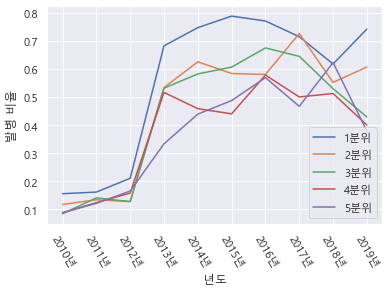

In [142]:
plt.plot(DF2_ratio)
plt.legend(['1분위', '2분위', '3분위', '4분위', '5분위'], loc = 'lower right')
plt.xticks(np.arange(0, 10, 1.0),['2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년'], rotation = -60)
plt.xlabel('년도'), plt.ylabel('발병 비율')

전체 소득 분위에서 2012년 이후 우울증 비율이 급격히 증가하는 것을 알 수 있으며 시간이 지남에도 소득 수준이 낮을수록 우울증 발병 비율이 높다는 것을 알 수 있다.

## 시간에 따른 소득과 갑상선암 발병 사이의 관계 변화

In [143]:
data10['DC7_2010'] = [np.nan if b > 1 else b for b in data10['DC7_pr']]
data11['DC7_2011'] = [np.nan if b > 1 else b for b in data11['DC7_pr']]
data12['DC7_2012'] = [np.nan if b > 1 else b for b in data12['DC7_pr']]
data13['DC7_2013'] = [np.nan if b > 1 else b for b in data13['DC7_pr']]
data14['DC7_2014'] = [np.nan if b > 1 else b for b in data14['DC7_pr']]
data15['DC7_2015'] = [np.nan if b > 1 else b for b in data15['DC7_pr']]
data16['DC7_2016'] = [np.nan if b > 1 else b for b in data16['DC7_pr']]
data17['DC7_2017'] = [np.nan if b > 1 else b for b in data17['DC7_pr']]
data18['DC7_2018'] = [np.nan if b > 1 else b for b in data18['DC7_pr']]
data19['DC7_2019'] = [np.nan if b > 1 else b for b in data19['DC7_pr']]
DC7_ratio10 = pd.DataFrame(data10.dropna(subset = ['DC7_2010']).groupby('incm5')['DC7_2010'].mean())
DC7_ratio11 = pd.DataFrame(data11.dropna(subset = ['DC7_2011']).groupby('incm5')['DC7_2011'].mean())
DC7_ratio12 = pd.DataFrame(data12.dropna(subset = ['DC7_2012']).groupby('incm5')['DC7_2012'].mean())
DC7_ratio13 = pd.DataFrame(data13.dropna(subset = ['DC7_2013']).groupby('incm5')['DC7_2013'].mean())
DC7_ratio14 = pd.DataFrame(data14.dropna(subset = ['DC7_2014']).groupby('incm5')['DC7_2014'].mean())
DC7_ratio15 = pd.DataFrame(data15.dropna(subset = ['DC7_2015']).groupby('incm5')['DC7_2015'].mean())
DC7_ratio16 = pd.DataFrame(data16.dropna(subset = ['DC7_2016']).groupby('incm5')['DC7_2016'].mean())
DC7_ratio17 = pd.DataFrame(data17.dropna(subset = ['DC7_2017']).groupby('incm5')['DC7_2017'].mean())
DC7_ratio18 = pd.DataFrame(data18.dropna(subset = ['DC7_2018']).groupby('incm5')['DC7_2018'].mean())
DC7_ratio19 = pd.DataFrame(data19.dropna(subset = ['DC7_2019']).groupby('incm5')['DC7_2019'].mean())

In [144]:
DC7_ratio = pd.concat([DC7_ratio10, DC7_ratio11 ,DC7_ratio12 ,DC7_ratio13, DC7_ratio14, DC7_ratio15, DC7_ratio16, DC7_ratio17, DC7_ratio18, DC7_ratio19], axis = 1).T
DC7_ratio

incm5,1.0,2.0,3.0,4.0,5.0
DC7_2010,1.000000,1.000000,0.555556,0.333333,0.600000
DC7_2011,0.800000,0.777778,0.555556,0.833333,0.571429
DC7_2012,1.000000,0.875000,0.875000,0.800000,0.500000
DC7_2013,1.000000,0.900000,0.600000,0.500000,0.666667
DC7_2014,0.555556,1.000000,0.636364,0.666667,0.600000
DC7_2015,0.454545,0.600000,0.500000,0.500000,0.692308
DC7_2016,0.500000,0.727273,0.642857,0.727273,0.533333
DC7_2017,0.416667,0.750000,0.533333,0.266667,0.500000
DC7_2018,0.714286,0.222222,0.416667,0.500000,0.538462
DC7_2019,0.545455,0.545455,0.437500,0.400000,0.117647


(Text(0.5, 0, '년도'), Text(0, 0.5, '발병 비율'))

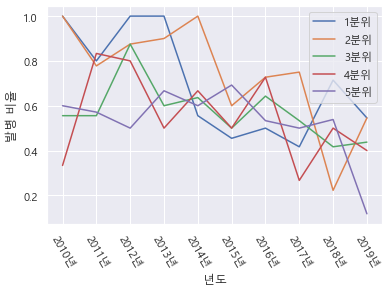

In [145]:
plt.plot(DC7_ratio)
plt.legend(['1분위', '2분위', '3분위', '4분위', '5분위'], loc = 'upper right')
plt.xticks(np.arange(0, 10, 1.0),['2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년'], rotation = -60)
plt.xlabel('년도'), plt.ylabel('발병 비율')

우울증과 달리 갑상선암은 시간에 따라 그래프 개형이 들쭉날쭉함을 알 수 있다. 그러므로 갑상선암은 2019년도에 일시적으로 소득 분위가 높을 수록 갑상선암에 걸린 환자의 비율이 줄어든 것처럼 보인 것이며 소득과 갑상선암은 관계가 없다는 결론을 내릴 수 있다.

# Summary

·2019년 국민건강영양조사 데이터셋 상에서 소득과 질병 사이에 유의미한 관계를 보였던 질병은 우울증과 갑상선암 두 질병이다.

·여러 햇수의 데이터셋을 모아 시간에 따른 비율 변화를 관찰하면 그 비율이 비슷하게 유지될수도 아닐 수도 있다.